# Chu 

## Example (Chu, et al., 2013)

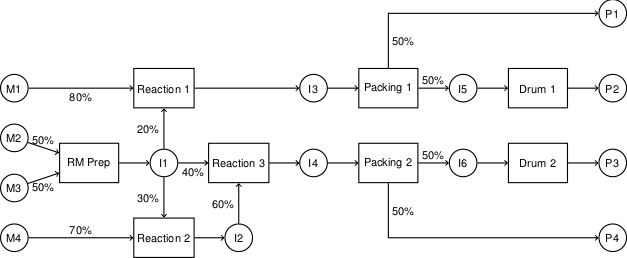

### References

Chu, Y., Wassick, J. M., & You, F. (2013). Efficient scheduling method of complex batch processes with general network structure via agent‐based modeling. AIChE Journal, 59(8), 2884-2906.

In [1]:
import sys
sys.path.append('../STN')
from STN import STN

# create instance
stn = STN()

# states
stn.state('M1', capacity = 500, init = 500)
stn.state('M2', capacity = 500, init = 500)
stn.state('M3', capacity = 500, init = 500)
stn.state('M3', capacity = 500, init = 500)
stn.state('M4', capacity = 500, init = 500)
stn.state('I1', capacity = 100)
stn.state('I2', capacity = 100)
stn.state('I3', capacity = 100)
stn.state('I4', capacity = 100)
stn.state('I5', capacity = 100)
stn.state('I6', capacity = 100)
stn.state('P1', capacity = 500)
stn.state('P2', capacity = 500)
stn.state('P3', capacity = 500)
stn.state('P4', capacity = 500)

# state to task arcs
stn.STarc('M1', 'Reaction_1', rho = 0.8)
stn.STarc('M2', 'RM Prep',    rho = 0.5)
stn.STarc('M3', 'RM Prep',    rho = 0.5)
stn.STarc('M4', 'Reaction_2', rho = 0.7)
stn.STarc('I1', 'Reaction_1', rho = 0.2)
stn.STarc('I1', 'Reaction_2', rho = 0.3)
stn.STarc('I1', 'Reaction_3', rho = 0.4)
stn.STarc('I2', 'Reaction_3', rho = 0.6)
stn.STarc('I3', 'Packing_1',  rho = 1.0)
stn.STarc('I4', 'Packing_2',  rho = 1.0)
stn.STarc('I5', 'Drum_1',     rho = 1.0)
stn.STarc('I6', 'Drum_2',     rho = 1.0)

# task to state arcs
stn.TSarc('RM Prep',    'I1', rho = 1.0, dur =  72)
stn.TSarc('Reaction_1', 'I3', rho = 1.0, dur = 162)
stn.TSarc('Reaction_2', 'I2', rho = 1.0, dur = 138)
stn.TSarc('Reaction_3', 'I4', rho = 1.0, dur = 162)
stn.TSarc('Packing_1',  'P1', rho = 0.5, dur = 108)
stn.TSarc('Packing_1',  'I5', rho = 0.5, dur = 108)
stn.TSarc('Packing_2',  'I6', rho = 0.5, dur = 108)
stn.TSarc('Packing_2',  'P4', rho = 0.5, dur = 108)
stn.TSarc('Drum_1',     'P2', rho = 1.0, dur =  90)
stn.TSarc('Drum_2',     'P3', rho = 1.0, dur =  90)

# unit-task data
stn.unit('RM Prep',   'RM Prep',    Bmax = 100, Cost = 1000, vCost =  50)
stn.unit('Reactor_1', 'Reaction_1', Bmax =  80, Cost = 3000, vCost = 250)
stn.unit('Reactor_1', 'Reaction_2', Bmax =  50, Cost = 1500, vCost = 150)
stn.unit('Reactor_1', 'Reaction_3', Bmax =  80, Cost = 2000, vCost = 100)
stn.unit('Reactor_2', 'Reaction_1', Bmax =  80, Cost = 3000, vCost = 250)
stn.unit('Reactor_2', 'Reaction_2', Bmax =  50, Cost = 1500, vCost = 150)
stn.unit('Reactor_2', 'Reaction_3', Bmax =  80, Cost = 2000, vCost = 100)
stn.unit('Finishing', 'Packing_1',  Bmax = 100, Cost =  500, vCost =  20)
stn.unit('Finishing', 'Packing_2',  Bmax = 100, Cost =  500, vCost =  20)
stn.unit('Drumming',  'Drum_1',     Bmax =  50, Cost =  200, vCost =  50)
stn.unit('Drumming',  'Drum_2',     Bmax =  50, Cost =  200, vCost =  50)

# sequence dependent swithover times
stn.switchover('Reaction_1', 'Reaction_1', 12)
stn.switchover('Reaction_1', 'Reaction_2', 30)
stn.switchover('Reaction_1', 'Reaction_3', 30)
stn.switchover('Reaction_2', 'Reaction_1', 30)
stn.switchover('Reaction_2', 'Reaction_2', 12)
stn.switchover('Reaction_2', 'Reaction_3',  6)
stn.switchover('Reaction_3', 'Reaction_1', 30)
stn.switchover('Reaction_3', 'Reaction_2', 30)
stn.switchover('Reaction_3', 'Reaction_3', 12)
stn.switchover('Packing_1',  'Packing_1',   0)
stn.switchover('Packing_1',  'Packing_2',   6)
stn.switchover('Packing_2',  'Packing_1',   6)
stn.switchover('Packing_1',  'Packing_1',   0)

N = 300
H = 6*N
stn.buildmodel(range(0,H+1,6))

# production constraints
stn.model.cons.add(stn.model.S['P1',H] == 200)
stn.model.cons.add(stn.model.S['P2',H] == 200)
stn.model.cons.add(stn.model.S['P3',H] == 100)
stn.model.cons.add(stn.model.S['P4',H] == 100)

stn.solve('gurobi')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x29801
  Lower bound: -0.0
  Upper bound: -0.0
  Number of objectives: 1
  Number of constraints: 5455631
  Number of variables: 12343
  Number of binary variables: 3311
  Number of integer variables: 3311
  Number of continuous variables: 9032
  Number of nonzeros: 10981990
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solv

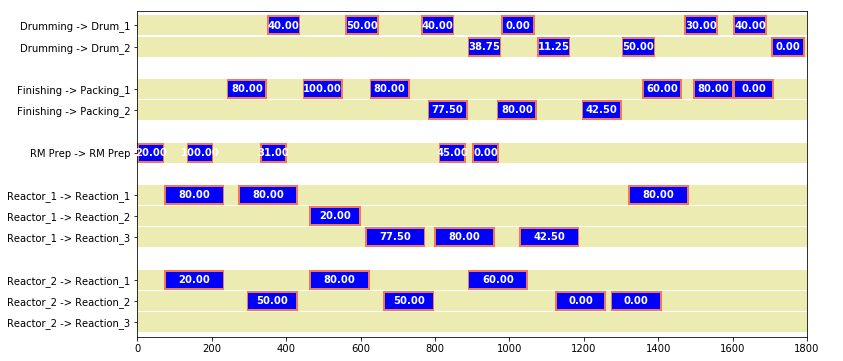

In [2]:
%matplotlib inline
stn.gantt()

In [20]:
stn.model.S['P1',H].value

200.0